<a href="https://colab.research.google.com/github/ah19147/Team-Project-Challenge/blob/master/Team_Project_challenge_Lovelace_House_prices_Version_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Note for people working on this:
At the current moment, this model needs to be refined for implementation and testing.
At this moment, that largely means removing more variables to see if that improves our score, albeit a potential change in model may be needed

NOTE:
 To anyone reading this, this notebook consists of 3 codes merged: 

*   Code from the machine-learning model tutorial here:
https://www.kaggle.com/apapiu/regularized-linear-models/notebook
*   Code from the Comprehensive data exploration tutorial here: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
*   and my code (/our code, if anyone else adds to this.)

I'll label which code portions are my doing, are taken from the comprehensive data exploration tutorial (CDE), and which are from the linear models tutorial (LM)




In [0]:
# Importing all necessary things that needed to be imported as needed from CDE and LM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor


In [0]:
# Set the files being read to some variables
train = pd.read_csv('/content/drive/My Drive/train.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')

**PART 1: COMPREHENSIVE DATA ANALYSIS**

This code comes largely from the CDE model, and also contains a little bit of my code to remove variables and test to make sure the train and test have a similar list of variables


In [0]:
# Print the columns of each. They should be the same.
train.columns
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

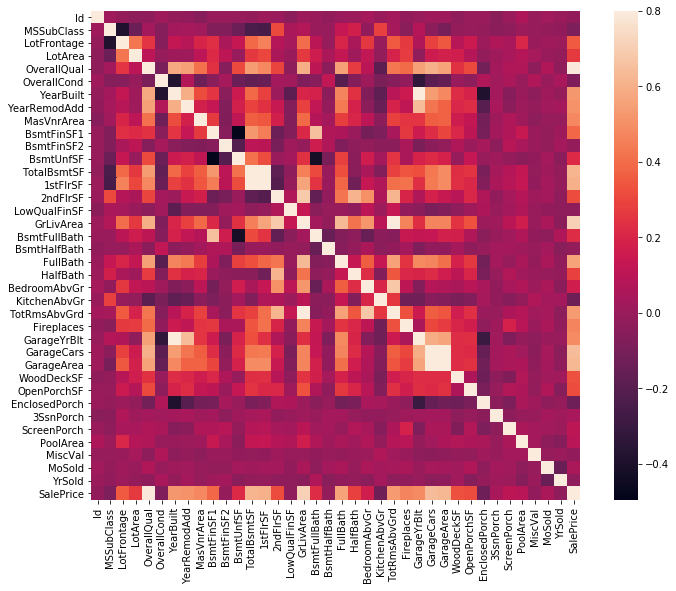

In [0]:
"""
- CDE
- Correlation matrix, showing correlations between the various variables
- Should Largely be looking at the bottom row and right-most column, the one tagged for sale price
- From this at first glance, can draw various conclusions:
    - Garage Cars, Garage area, OverallQual, GrLivArea, seem to be strongest variables
    - Garage Cars and area are also strongly correlated to each other, similarly with TotalBsmtSF and 1stFirSF
    - Other conclusions include that stuff like OverallCond, BsmtFinSF2 is not as relevant as other variables.

"""
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
"""
- CDE
- This bit of code from the comprehensive data exploration analyses the missing features portions of the house prices which are missing
- According to the tutorial, we should remove values higher than 15% (0.15), which will be done in a further bit of code
- Also according to the tutorial, we should also drop the GarageX and the BsmtX variables, since we already have the important variables from them
- Also dropping the VasVnrX variables

Does so via calculating the number of null values, calculating the average and then percentage of it that is null
"""
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
# Manually dropping the missing data here

# CDE variables that are reccomended to be dropped - 18
train = train.drop(columns='LotFrontage')
train = train.drop(columns='PoolQC')
train = train.drop(columns='MiscFeature')
train = train.drop(columns='Alley')
train = train.drop(columns='Fence')
train = train.drop(columns='FireplaceQu')
train = train.drop(columns='GarageCond')
train = train.drop(columns='GarageType')
train = train.drop(columns='GarageYrBlt')
train = train.drop(columns='GarageFinish')
train = train.drop(columns='GarageQual')
train = train.drop(columns='BsmtExposure')
train = train.drop(columns='BsmtFinType2')
train = train.drop(columns='BsmtFinType1')
train = train.drop(columns='BsmtCond')
train = train.drop(columns='BsmtQual')
train = train.drop(columns='MasVnrArea')
train = train.drop(columns='MasVnrType')

# Additional Variables being dropped by our own research. - 8
train = train.drop(columns='EnclosedPorch')
train = train.drop(columns='3SsnPorch')
train = train.drop(columns='ScreenPorch')
train = train.drop(columns='PoolArea') 
train = train.drop(columns='KitchenAbvGr')
train = train.drop(columns='LowQualFinSF')
train = train.drop(columns='BsmtFinSF2')
train = train.drop(columns='OverallCond')


# Dropping A group of variables here: - 8
train = train.drop(columns='MSSubClass')
train = train.drop(columns='LandSlope')
train = train.drop(columns='1stFlrSF')
train = train.drop(columns='TotRmsAbvGrd')
train = train.drop(columns='WoodDeckSF')
train = train.drop(columns='MoSold')
train = train.drop(columns='YrSold')

# Dropping group B variables here: - needs to be checked
train = train.drop(columns='HalfBath') # Checked - can be safely removed

train = train.drop(columns='GarageArea')
train = train.drop(columns='2ndFlrSF')
train = train.drop(columns='BsmtHalfBath')
train = train.drop(columns='MiscVal')

"""
# Dropping group C variables - these are the ones taken from here: https://www.kaggle.com/jimthompson/ensemble-model-stacked-model-example :

train = train.drop(columns='Street')
train = train.drop(columns='Utilities')
train = train.drop(columns='LotConfig')
train = train.drop(columns='Condition2')
train = train.drop(columns='RoofMatl')
train = train.drop(columns='ExterCond')
train = train.drop(columns='Heating')
train = train.drop(columns='SaleType')
"""

train.columns


Index(['Id', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageCars', 'PavedDrive', 'OpenPorchSF', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [0]:
# Dropping appropiate variables from test as well
# CDE variables that are reccomended to be dropped
test = test.drop(columns='LotFrontage')
test = test.drop(columns='PoolQC')
test = test.drop(columns='MiscFeature')
test = test.drop(columns='Alley')
test = test.drop(columns='Fence')
test = test.drop(columns='FireplaceQu')
test = test.drop(columns='GarageCond')
test = test.drop(columns='GarageType')
test = test.drop(columns='GarageYrBlt')
test = test.drop(columns='GarageFinish')
test = test.drop(columns='GarageQual')
test = test.drop(columns='BsmtExposure')
test = test.drop(columns='BsmtFinType2')
test = test.drop(columns='BsmtFinType1')
test = test.drop(columns='BsmtCond')
test = test.drop(columns='BsmtQual')
test = test.drop(columns='MasVnrArea')
test = test.drop(columns='MasVnrType')

# Additional Variables being dropped.
test = test.drop(columns='EnclosedPorch')
test = test.drop(columns='3SsnPorch')
test = test.drop(columns='ScreenPorch')
test = test.drop(columns='PoolArea') 
test = test.drop(columns='KitchenAbvGr')
test = test.drop(columns='LowQualFinSF')
test = test.drop(columns='BsmtFinSF2')
test = test.drop(columns='OverallCond')

# Group A variables being dropped
test = test.drop(columns='MSSubClass')
test = test.drop(columns='LandSlope')
test = test.drop(columns='1stFlrSF')
test = test.drop(columns='TotRmsAbvGrd')
test = test.drop(columns='WoodDeckSF')
test = test.drop(columns='MoSold')
test = test.drop(columns='YrSold')

# Dropping group B variables here: - Need to check
test = test.drop(columns='HalfBath') # Checked - can be safely removed

test = test.drop(columns='GarageArea')
test = test.drop(columns='2ndFlrSF')
test = test.drop(columns='BsmtHalfBath')
test = test.drop(columns='MiscVal')
"""
# Dropping group C variables here: - Need to check, overall Decrease to score
test = test.drop(columns='Street')
test = test.drop(columns='Utilities')
test = test.drop(columns='LotConfig')
test = test.drop(columns='Condition2')
test = test.drop(columns='RoofMatl')
test = test.drop(columns='ExterCond')
test = test.drop(columns='Heating')
test = test.drop(columns='SaleType')
"""
test.columns


Index(['Id', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageCars', 'PavedDrive', 'OpenPorchSF', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [0]:
# Tests to see if any variables are missing
missing_list = []
missing_variables = False

a = 0
i = 0
j = 0

# Iterates through both columns, and checks them for any potential missing values
while(a < len(train.columns)-2):
  a += 1
  i += 1
  if(train.columns[i] == test.columns[i]):
    print(train.columns[i],i,test.columns[i])
  else:
    missing_variables = True
    missing_list.append(train.columns[i])

if(missing_variables):
  print("There is a missing variable at:\n",missing_list)



MSZoning 1 MSZoning
LotArea 2 LotArea
Street 3 Street
LotShape 4 LotShape
LandContour 5 LandContour
Utilities 6 Utilities
LotConfig 7 LotConfig
Neighborhood 8 Neighborhood
Condition1 9 Condition1
Condition2 10 Condition2
BldgType 11 BldgType
HouseStyle 12 HouseStyle
OverallQual 13 OverallQual
YearBuilt 14 YearBuilt
YearRemodAdd 15 YearRemodAdd
RoofStyle 16 RoofStyle
RoofMatl 17 RoofMatl
Exterior1st 18 Exterior1st
Exterior2nd 19 Exterior2nd
ExterQual 20 ExterQual
ExterCond 21 ExterCond
Foundation 22 Foundation
BsmtFinSF1 23 BsmtFinSF1
BsmtUnfSF 24 BsmtUnfSF
TotalBsmtSF 25 TotalBsmtSF
Heating 26 Heating
HeatingQC 27 HeatingQC
CentralAir 28 CentralAir
Electrical 29 Electrical
GrLivArea 30 GrLivArea
BsmtFullBath 31 BsmtFullBath
FullBath 32 FullBath
BedroomAbvGr 33 BedroomAbvGr
KitchenQual 34 KitchenQual
Functional 35 Functional
Fireplaces 36 Fireplaces
GarageCars 37 GarageCars
PavedDrive 38 PavedDrive
OpenPorchSF 39 OpenPorchSF
SaleType 40 SaleType
SaleCondition 41 SaleCondition


**PART 2: LINEAR MODEL AND PREDICTIONS**

A good portion of this code comes from the linear model tutorial, which also then uses Lasso and XGBoost models to provide a prediction.

I have attempted to also introduce a base Decision Tree Regressor model, to see if we could then use an ensemble model later, but for now that hasn't turned out much, as you may be able to see the entire next block of code being commented out.


In [0]:
"""
# With the machine learning course now back up and running, I'm trying to see if we can implement a base model, 
which may then be used for ensembling later with the lasso and XGboost model later

# Initial code
train_data = train.dropna(axis=0)

test_data = test.dropna(axis=0)

#print(train_data)

# Code to try and fix an initial problem
train_data['label'] = 'train'
test_data['label'] = 'test'
data = pd.concat((train_data,test_data))
#print(data)

data = pd.get_dummies(data,columns=data.columns[0:42])
#print(data.columns)

train_data = data[data['label'] == 'train']
print(train_data)

test_data = data[data['label'] == 'test']
print(train_data.columns)

train_data = train_data.drop('label')

test_data = test_data.drop('label')

# Initial code
#train_data = pd.get_dummies(train_data)
#print(train_data)
#test_data = pd.get_dummies(test_data)
prediction_target = train.SalePrice
print(prediction_target)
prediction_target = prediction_target.drop(0)

X = train_data[0:1460]
X.shape

print(X)
# Initial code
model_regressor = DecisionTreeRegressor(random_state=1)
model_regressor.fit(X,prediction_target)

# An error comes up here with initial code
predictionary = model_regressor.predict(test_data)
"""



"\n# With the machine learning course now back up and running, I'm trying to see if we can implement a base model, \nwhich may then be used for ensembling later with the lasso and XGboost model later\n\n# Initial code\ntrain_data = train.dropna(axis=0)\n\ntest_data = test.dropna(axis=0)\n\n#print(train_data)\n\n# Code to try and fix an initial problem\ntrain_data['label'] = 'train'\ntest_data['label'] = 'test'\ndata = pd.concat((train_data,test_data))\n#print(data)\n\ndata = pd.get_dummies(data,columns=data.columns[0:42])\n#print(data.columns)\n\ntrain_data = data[data['label'] == 'train']\nprint(train_data)\n\ntest_data = data[data['label'] == 'test']\nprint(train_data.columns)\n\ntrain_data = train_data.drop('label')\n\ntest_data = test_data.drop('label')\n\n# Initial code\n#train_data = pd.get_dummies(train_data)\n#print(train_data)\n#test_data = pd.get_dummies(test_data)\nprediction_target = train.SalePrice\nprint(prediction_target)\nprediction_target = prediction_target.drop(0)\n\

In [0]:
# Gather up all the data together in one variable - LM
all_data = pd.concat((train.loc[:,'MSZoning':'SaleCondition'],
                      test.loc[:,'MSZoning':'SaleCondition']))

print(all_data)

     MSZoning  LotArea Street  ... OpenPorchSF SaleType SaleCondition
0          RL     8450   Pave  ...          61       WD        Normal
1          RL     9600   Pave  ...           0       WD        Normal
2          RL    11250   Pave  ...          42       WD        Normal
3          RL     9550   Pave  ...          35       WD       Abnorml
4          RL    14260   Pave  ...          84       WD        Normal
...       ...      ...    ...  ...         ...      ...           ...
1454       RM     1936   Pave  ...           0       WD        Normal
1455       RM     1894   Pave  ...          24       WD       Abnorml
1456       RL    20000   Pave  ...           0       WD       Abnorml
1457       RL    10441   Pave  ...          32       WD        Normal
1458       RL     9627   Pave  ...          48       WD        Normal

[2919 rows x 41 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41b069d710>,
      dtype=object)

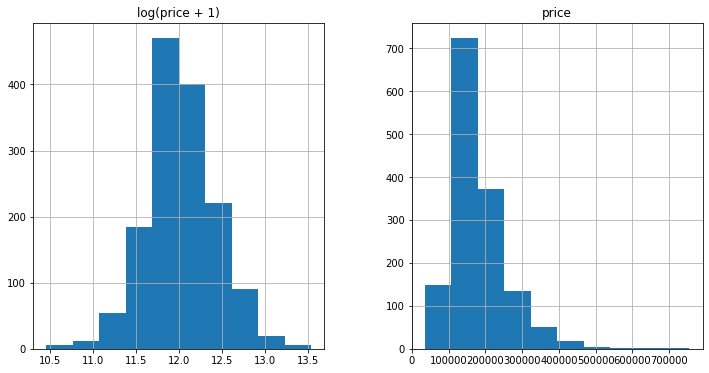

In [0]:
# Shows some histograms showing skewness and stuff of the sale price - LM
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [0]:
# Does a bunch of log transformations to normalise the variables - LM
# LM - "log transform the target (Saleprice):"
train["SalePrice"] = np.log1p(train["SalePrice"])

# LM - "log transform skewed numeric features:"
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [0]:
# Splits and assign dummy variables / data to Catergorical variables
all_data = pd.get_dummies(all_data)

In [0]:
# Replacing null data and/or NA's with the mean of the data to be able to use it with models - LM
all_data = all_data.fillna(all_data.mean())

In [0]:
# LM - "Creating matrices for sklearn:"
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [0]:
# Importing Lasso Models for use in the model - LM
from sklearn.linear_model import ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

# Creates a function to determine rsme for cross validation techniques - LM
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [0]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [0]:
# LM - lasso is deciding some of its own variables to remove.
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [0]:
# LM
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [0]:
# Use an XGB boost - LM
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

[12:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
# LM
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [0]:
# LM
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})


In [0]:
# LM
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [0]:
# Prints the solution to a .csv file -LM
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("sol_teamsix_test.csv", index = False)